In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('data/Advertising.csv')

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.drop('Unnamed: 0',axis = 1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.shape

(200, 4)

In [20]:
cols = ['TV', 'Radio', 'Newspaper']

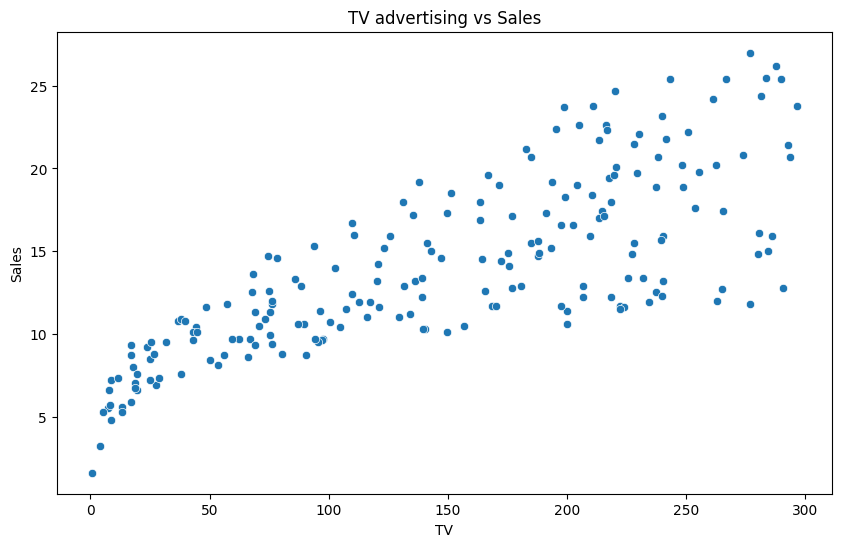

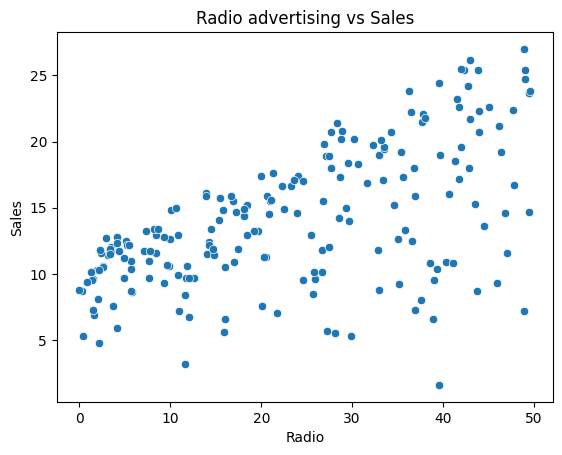

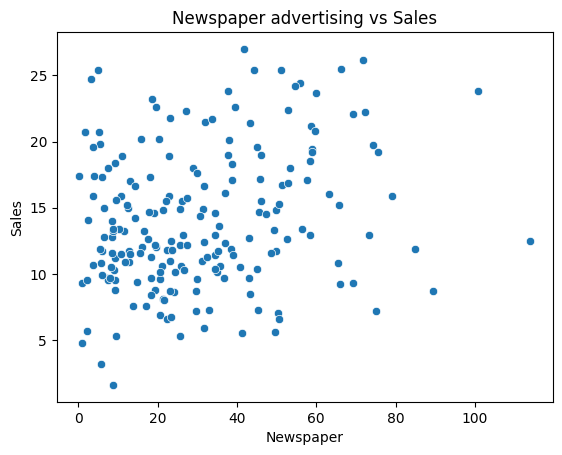

In [33]:
plt.figure(figsize=(10,6))
for feat in cols:
  sns.scatterplot(x=f'{feat}',y='Sales',data=data)
  plt.title(f'{feat} advertising vs Sales')
  plt.xlabel(f'{feat}')
  plt.ylabel('Sales')
  plt.show()

<Figure size 1000x600 with 0 Axes>

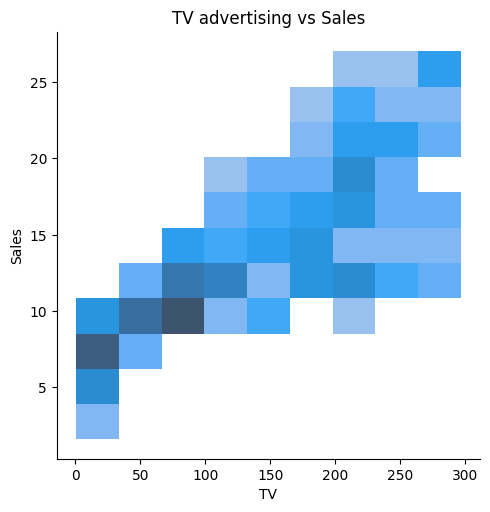

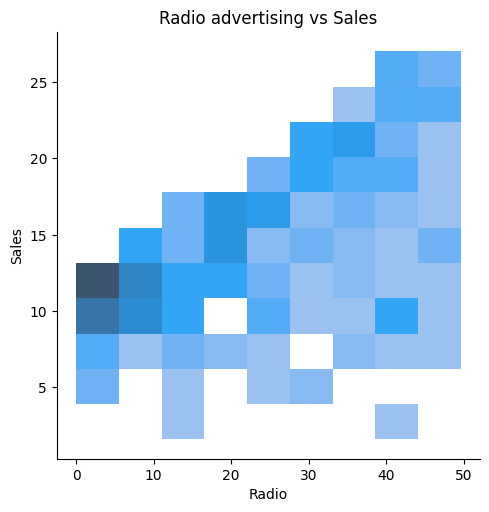

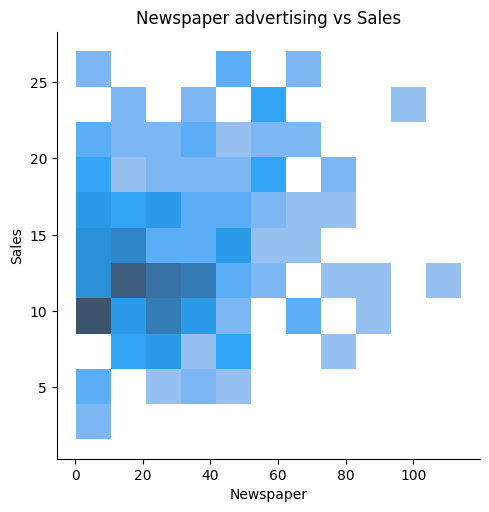

In [35]:
plt.figure(figsize=(10,6))
for feat in cols:
  sns.displot(x=f'{feat}',y='Sales',data=data)
  plt.title(f'{feat} advertising vs Sales')
  plt.xlabel(f'{feat}')
  plt.ylabel('Sales')
  plt.show()

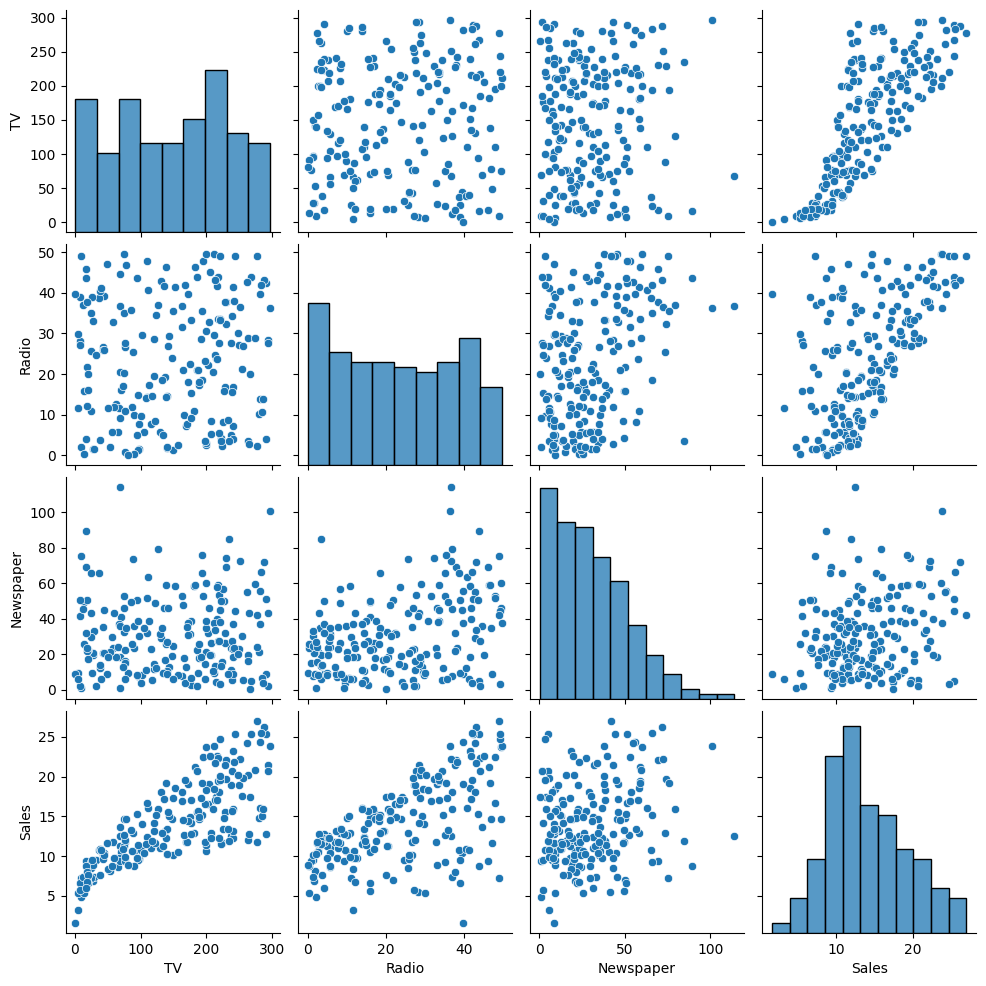

In [36]:
sns.pairplot(data)
plt.show()

In [37]:
data['total_adv'] = data['TV'] + data['Radio'] + data['Newspaper']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
 4   total_adv  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [39]:
X = data.drop('Sales',axis=1)
y = data['Sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.882702945190268, 0.9720341431276257)

In [48]:
import random
sample = data[['TV', 'Radio', 'Newspaper']].sample(n=10, random_state=42)
sample.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [49]:
sample

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [50]:
sample['total_adv'] = sample['TV'] + sample['Radio'] + sample['Newspaper']
sample

,TV,Radio,Newspaper,total_adv
95,163.3,31.6,52.9,247.8
15,195.4,47.7,52.9,296.0
30,292.9,28.3,43.2,364.4
158,11.7,36.9,45.2,93.8
128,220.3,49.0,3.2,272.5
115,75.1,35.0,52.7,162.8
69,216.8,43.9,27.2,287.9
170,50.0,11.6,18.4,80.0
174,222.4,3.4,13.1,238.9
45,175.1,22.5,31.5,229.1


In [53]:
gbr = model.predict(sample)
gbr

array([17.23910087, 22.37217126, 21.26986251,  6.44166927, 23.46795458,
       13.31027689, 23.07807155,  9.32478214, 11.74697101, 15.57588518])